# <center>Pandas可视化</center>

# 1 导入包

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2 配置matplotlib

In [5]:
# 配置matplotlib页内可视
%matplotlib inline
# 配置matplotlib可显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']

# 3 加载文件

In [6]:
df_position = pd.read_csv('./pandas_data/dataAnalyst_sql.csv')

In [7]:
df_position.head(1)

,positionId,city,companyId,firstType,secondType,education,industryField,positionAdvantage,positionName,positionLables,salary,workYear
0,2537336,上海,8581,技术,数据开发,硕士,移动互联网,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生


**清洗salary列，拆分为薪资下限列（buttom）、薪资上限列（top)、计算平均薪资列（avg)**

In [8]:
df_position['buttom'] = df_position.salary.str.split('-').str[0].str.replace('[kK以上以下]', '')

In [9]:
df_position['top'] = df_position.salary.str.split('-').str[1].str.replace('[kK]', '')

In [10]:
df_position.buttom = df_position.buttom.astype(np.float)
df_position.top = df_position.top.astype(np.float)

In [11]:
df_position['avg'] = (df_position.buttom + df_position.top) / 2

In [12]:
df_position.head()

,positionId,city,companyId,firstType,secondType,education,industryField,positionAdvantage,positionName,positionLables,salary,workYear,buttom,top,avg
0,2537336,上海,8581,技术,数据开发,硕士,移动互联网,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生,7.0,9.0,8.0
1,2427485,上海,23177,技术,数据开发,本科,金融,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生,10.0,15.0,12.5
2,2511252,上海,57561,设计,数据分析,本科,移动互联网,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生,4.0,6.0,5.0
3,2427530,上海,7502,市场与销售,数据分析,本科,"企业服务,数据服务",五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生,6.0,8.0,7.0
4,2245819,上海,130876,技术,软件开发,本科,其他,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生,2.0,3.0,2.5


**将清洗好的数据保存到csv文件**

In [13]:
df_position.to_csv('./pandas_data/position_utf8.csv', encoding='utf8')

# 4 图形类别

- **折线图plot**
- **柱形图bar**
- **直方图hist**
- **箱线图box**
- **密度图kde**
- **面积图area**
- **散点图scatter**
- **散点图矩阵scatter_matrix**
- **饼图pie**

## 4.1 折线图

**平均薪资avg分组计数折线图**

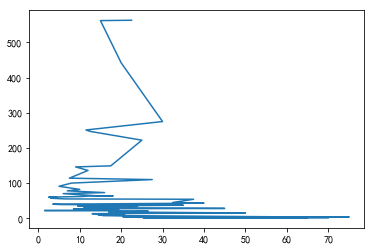

In [14]:
df_position.avg.value_counts().plot()

**因为默认将索引当作X轴，所以画图前先对索引进行排序**

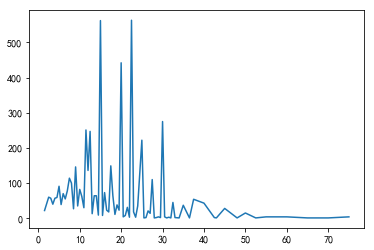

In [15]:
df_position.avg.value_counts().sort_index().plot()

**由上图可看出，平均薪资在15K和22K的人数占大多数**

## 4.2 柱形图和条形图

**画出各个地区各个学历的招聘职位数量的柱形图**

In [16]:
pivot_city_education = df_position.pivot_table(index='city',
                                         columns='education',
                                         values='avg',
                                         aggfunc='count'
                                        )
pivot_city_education.head()

education,不限,博士,大专,本科,硕士
city,,,,,
上海,68.0,3.0,110.0,714.0,73.0
北京,123.0,2.0,189.0,1868.0,150.0
南京,5.0,NaN,11.0,60.0,6.0
厦门,3.0,NaN,7.0,18.0,2.0
天津,1.0,NaN,4.0,15.0,NaN


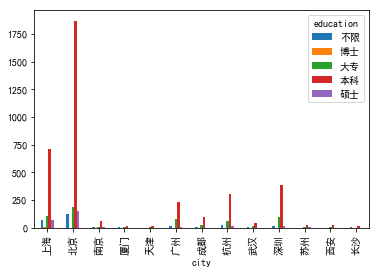

In [17]:
pivot_city_education.plot.bar()

**堆积柱形图**

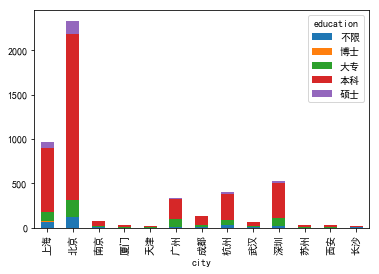

In [18]:
pivot_city_education.plot.bar(stacked=True)

**条形图**

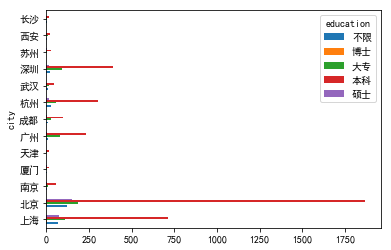

In [19]:
pivot_city_education.plot.barh()

**因为坐标轴为中文所以识别不了，可以在matplotlib画图中得到解决**

## 4.3 直方图

### 4.3.1 单直方图

**总体平均薪资的直方图**

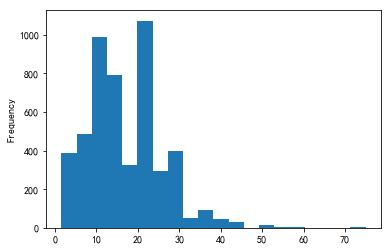

In [20]:
df_position.avg.plot.hist(bins=20)

**由上图可知，薪资15K和22K的面积最大，说明薪资在该区域的人数占大多数，和avg的折线图表现一致**

### 4.3.2 多直方图

**在一张图中画出不同学历平均薪资的直方图（重点是每种学历需要单独作为一列数据）**

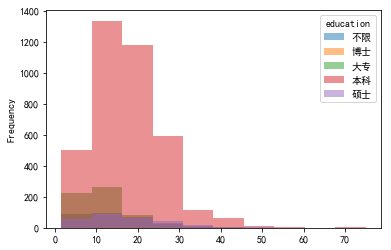

In [21]:
df_position.groupby('education').apply(lambda x: x.avg).unstack(level=0).plot.hist(alpha=0.5)

**alpha参数用来设置透明度，蓝色表示不限学历的数据太少，查看不是很明显；粉色表示本科。**

## 4.4 箱线图

**画出不同学历的平均薪资的箱线图**

### 4.4.1 方法一

**同直方图，若需要画出不同维度的箱线图，则需要将数据按维度划分并以列的形式存放**

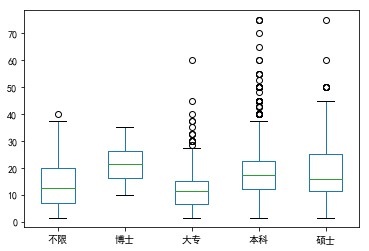

In [22]:
df_position.groupby('education').apply(lambda x: x.avg).unstack(level=0).plot.box()

### 4.4.2 方法二

**直接只用DataFrame级的boxplot函数**

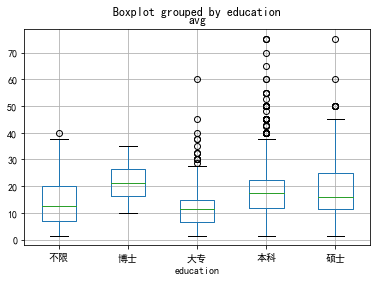

In [23]:
df_position.boxplot(column='avg', by='education')

## 4.5 密度图

**密度函数，概率学应用分布**

**画出总体平均薪资的密度图**

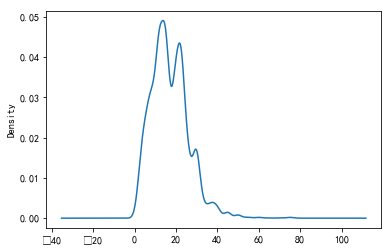

In [24]:
df_position.avg.plot.kde()

**密度分布函数，参考标准正太分布的密度函数**

## 4.6 面积图

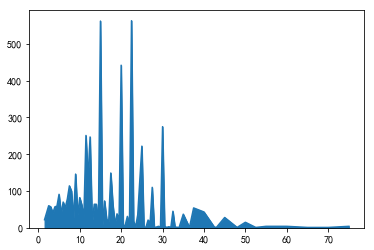

In [25]:
df_position.avg.value_counts().sort_index().plot.area()

**各个学历各个平均薪资计数的面积图**

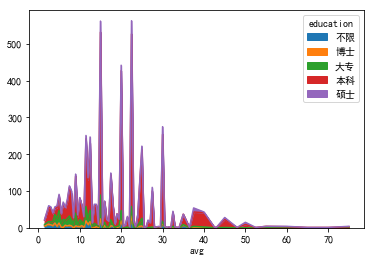

In [26]:
df_position.pivot_table(index='avg',
                        columns='education',
                        values='positionId',
                        aggfunc='count'
                       ).plot.area()

## 4.7 散点图

**画出各个公司职位薪资平均值、招聘职位数以及招聘职位平均工资最大值的散点图**

In [27]:
scatter_company = df_position.groupby('companyId').agg(['mean', 'count', 'max']).avg
scatter_company.head()

,mean,count,max
companyId,,,
43,11.500000,1,11.5
53,16.250000,4,20.0
62,17.125000,32,37.5
70,27.500000,1,27.5
91,29.227273,11,45.0


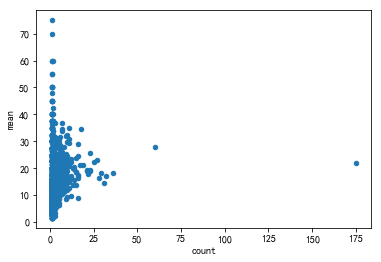

In [28]:
scatter_company.plot.scatter(x='count', y='mean')

**或者直在一张图中画出矩阵散点图**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002699CDAFE10>,
      dtype=object)

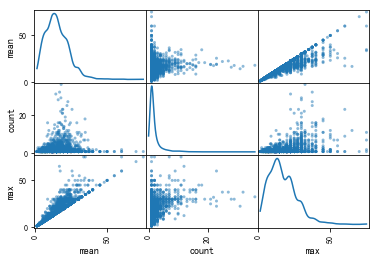

In [29]:
pd.plotting.scatter_matrix(frame=scatter_company.query('count<50'), diagonal='kde')